**Transfer learning with tensorflow hub**

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import math
import tensorflow_hub as hub

In [2]:
URL = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"
zip_dir = tf.keras.utils.get_file("cats_and_dogs_filtered.zip", origin=URL, extract=True)
print(zip_dir)
base_dir = os.path.dirname(zip_dir)
print(base_dir)
!find $base_dir -type d -print
print("-------------------------------------------------------")
train_dir = os.path.join(base_dir, "cats_and_dogs_filtered/train")
validation_dir = os.path.join(base_dir, "cats_and_dogs_filtered/validation")
train_dogs_dir = os.path.join(base_dir, "cats_and_dogs_filtered/train/dogs")
train_cats_dir = os.path.join(base_dir, "cats_and_dogs_filtered/train/cats")
validation_dogs_dir = os.path.join(base_dir, "cats_and_dogs_filtered/validation/dogs")
validation_cats_dir = os.path.join(base_dir, "cats_and_dogs_filtered/validation/cats")

68608000/68606236 [==============================] - 1s 0us/step
/root/.keras/datasets/cats_and_dogs_filtered.zip
/root/.keras/datasets
/root/.keras/datasets
/root/.keras/datasets/cats_and_dogs_filtered
/root/.keras/datasets/cats_and_dogs_filtered/train
/root/.keras/datasets/cats_and_dogs_filtered/train/dogs
/root/.keras/datasets/cats_and_dogs_filtered/train/cats
/root/.keras/datasets/cats_and_dogs_filtered/validation
/root/.keras/datasets/cats_and_dogs_filtered/validation/dogs
/root/.keras/datasets/cats_and_dogs_filtered/validation/cats
-------------------------------------------------------


In [3]:
BATCH_SIZE =100
IMG_SHAPE = 150
train_data_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, horizontal_flip=True, rotation_range=45, zoom_range=0.2, height_shift_range=0.2, shear_range=0.2, width_shift_range=0.2 )
validation_data_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
train_data_process = train_data_gen.flow_from_directory(directory=train_dir, target_size=(224, 224), shuffle = True, class_mode="binary", batch_size=BATCH_SIZE)
validation_data_process = validation_data_gen.flow_from_directory(directory=validation_dir, target_size=(224, 224), shuffle = False,   class_mode="binary", batch_size=BATCH_SIZE)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [4]:
mobilenetmodel = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
model  = tf.keras.Sequential([
       hub.KerasLayer(mobilenetmodel, trainable=False, input_shape=(224, 224, 3)),
       tf.keras.layers.Dense(2, activation="softmax")

])
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()
print(type(model))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1280)              2257984   
_________________________________________________________________
dense (Dense)                (None, 2)                 2562      
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________
<class 'tensorflow.python.keras.engine.sequential.Sequential'>


Epoch 1/6
20/20 [==============================] - 61s 1s/step - loss: 0.5428 - accuracy: 0.7032 - val_loss: 0.1317 - val_accuracy: 0.9620
Epoch 2/6
20/20 [==============================] - 27s 1s/step - loss: 0.1542 - accuracy: 0.9430 - val_loss: 0.0837 - val_accuracy: 0.9750
Epoch 3/6
20/20 [==============================] - 27s 1s/step - loss: 0.1060 - accuracy: 0.9604 - val_loss: 0.0712 - val_accuracy: 0.9770
Epoch 4/6
20/20 [==============================] - 27s 1s/step - loss: 0.1035 - accuracy: 0.9572 - val_loss: 0.0683 - val_accuracy: 0.9790
Epoch 5/6
20/20 [==============================] - 27s 1s/step - loss: 0.0870 - accuracy: 0.9677 - val_loss: 0.0617 - val_accuracy: 0.9790
Epoch 6/6
20/20 [==============================] - 27s 1s/step - loss: 0.0919 - accuracy: 0.9693 - val_loss: 0.0588 - val_accuracy: 0.9810
{'loss': [0.38428187370300293, 0.1477409154176712, 0.10260746628046036, 0.10182957351207733, 0.09153242409229279, 0.08803781121969223], 'accuracy': [0.822499990463256

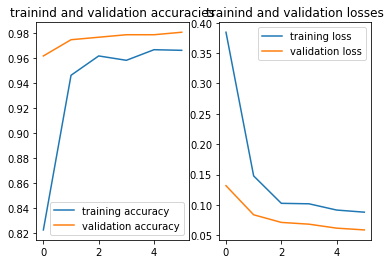

In [5]:
history = model.fit(train_data_process, epochs=6, steps_per_epoch=20, validation_data=validation_data_process, validation_steps=10)
print(history.history)
train_accuracy = history.history["accuracy"]
validation_accuracy = history.history["val_accuracy"]
train_loss = history.history["loss"]
validation_loss = history.history["val_loss"]
plt.subplot(121)
plt.plot(train_accuracy, label="training accuracy")
plt.plot(validation_accuracy, label="validation accuracy")
plt.legend()
plt.title("trainind and validation accuracies")

plt.subplot(122)
plt.plot(train_loss, label="training loss")
plt.plot(validation_loss, label="validation loss")
plt.legend()
plt.title("trainind and validation losses")
plt.show()

In [6]:
train_data_secondbatchfeatures, train_data_secondbatchlabels = train_data_process[1]
figs, axis = plt.subplots(100, figsize=(400, 400))
for index in range(len(train_data_secondbatchfeatures)):
  axis[index].imshow(train_data_secondbatchfeatures[index])

In [18]:
prediction = model.predict(train_data_secondbatchfeatures)
for i in range(len(prediction)):
  highernum = np.argmax(prediction[i])
  print(highernum)

1
1
1
1
0
1
1
1
0
0
1
1
0
1
0
1
1
0
1
0
0
1
1
1
0
0
0
0
0
0
1
1
1
0
0
1
0
0
0
0
1
0
0
1
1
1
1
0
1
0
1
0
1
1
0
0
0
0
1
1
1
1
1
1
0
1
0
1
1
0
1
1
0
0
1
0
0
1
1
0
0
0
0
0
1
1
0
1
0
1
1
0
1
1
0
0
1
0
0
0


In [19]:
model.save("./TLdc1.h5")

Reloading model in h5 are mostly use to resume training when new data are available.

In [20]:
reloadmodel = tf.keras.models.load_model("/content/TLdc1.h5", custom_objects={"KerasLayer": hub.KerasLayer})
prediction2 = reloadmodel.predict(train_data_secondbatchfeatures)
for i in range(len(prediction2)):
  highernum2 = np.argmax(prediction2[i])
  print(highernum2)

1
1
1
1
0
1
1
1
0
0
1
1
0
1
0
1
1
0
1
0
0
1
1
1
0
0
0
0
0
0
1
1
1
0
0
1
0
0
0
0
1
0
0
1
1
1
1
0
1
0
1
0
1
1
0
0
0
0
1
1
1
1
1
1
0
1
0
1
1
0
1
1
0
0
1
0
0
1
1
0
0
0
0
0
1
1
0
1
0
1
1
0
1
1
0
0
1
0
0
0


In [21]:
abs(prediction-prediction2).max()

0.0

In [22]:
tf.keras.models.save_model(model, "./TLdcSavedModel", save_format="tf")

INFO:tensorflow:Assets written to: ./TLdcSavedModel/assets


INFO:tensorflow:Assets written to: ./TLdcSavedModel/assets


In [23]:
reloadsavedmodel = tf.keras.models.load_model("/content/TLdcSavedModel", custom_objects={"KerasLayers" : hub.KerasLayer})

In [24]:

prediction3 = reloadsavedmodel.predict(train_data_secondbatchfeatures)
for i in range(len(prediction3)):
  highernum3 = np.argmax(prediction3[i])
  print(highernum3)

1
1
1
1
0
1
1
1
0
0
1
1
0
1
0
1
1
0
1
0
0
1
1
1
0
0
0
0
0
0
1
1
1
0
0
1
0
0
0
0
1
0
0
1
1
1
1
0
1
0
1
0
1
1
0
0
0
0
1
1
1
1
1
1
0
1
0
1
1
0
1
1
0
0
1
0
0
1
1
0
0
0
0
0
1
1
0
1
0
1
1
0
1
1
0
0
1
0
0
0


In [25]:
  abs(prediction - prediction3).max()


0.0

In [26]:
!zip -r /content/file.zip /content/TLdcSavedModel

  adding: content/TLdcSavedModel/ (stored 0%)
  adding: content/TLdcSavedModel/assets/ (stored 0%)
  adding: content/TLdcSavedModel/variables/ (stored 0%)
  adding: content/TLdcSavedModel/variables/variables.data-00000-of-00001 (deflated 8%)
  adding: content/TLdcSavedModel/variables/variables.index (deflated 78%)
  adding: content/TLdcSavedModel/saved_model.pb (deflated 92%)


In [27]:
from google.colab import files
files.download("/content/file.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>